## Chapter 10 -- Matrix multiplication

Modified by kmp 2022

Sources:

https://web.stanford.edu/~boyd/vmls/

https://github.com/vbartle/VMLS-Companions

Based on "Boyd and Vandenberghe, 2021, Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares - Julia Language Companion" https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf


In [1]:
using LinearAlgebra
using VMLS

### 10.1 Matrix-matrix multiplication
In Julia the product of matrices `A` and `B` is obtained with **`A*B`**. We calculate the matrix product on page [177](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.10.1) of VMLS. 

In [2]:
A = [-1.5 3 2; 1 -1 0]

2×3 Matrix{Float64}:
 -1.5   3.0  2.0
  1.0  -1.0  0.0

In [3]:
B = [-1 -1; 0 -2; 1 0]

3×2 Matrix{Int64}:
 -1  -1
  0  -2
  1   0

In [4]:
C = A*B

2×2 Matrix{Float64}:
  3.5  -4.5
 -1.0   1.0

**Gram matrix.** The **`Gram matrix`** of a matrix $A$ is the matrix $G = A^TA$. It is a **`symmetric` matrix** and the $i$, $j$ element $G_{ij}$ is the inner product of columns $i$ and $j$ of $A$.

In [5]:
 A = randn(10,3)
 G = A'*A

3×3 Matrix{Float64}:
 14.0441    1.88877  -6.87592
  1.88877   7.13524  -2.6368
 -6.87592  -2.6368   12.7168

In [9]:
# G[i,i] is the norm of column i in A, squared 
G[2,2], norm(A[:,2])^2

(7.1352360117548015, 7.1352360117548015)

In [10]:
# G[i,j} is inner product of columns i and j in A
G[1,3], A[:,1]'*A[:,3]

(-6.875922622995323, -6.875922622995323)

**Complexity of matrix triple product.** Let us check the associative property, which states that $(AB)C = A(BC)$ for any $m×n$ matrix $A$, any $n×p$ matrix $B$, and any $p × q$ matrix $B$. At the same time we will see that the left-hand and right-hand sides take very different amounts of time to compute.

In [21]:
m = 2000
n = 50
q = 2000
p = 2000

A = randn(m,n)
B = randn(n,p)
C = randn(p,q)

@time LHS = (A*B)*C
@time (A*B)*C
@time RHS = A*(B*C)
@time A*(B*C)
@time A*B*C # evaluated as (A*B)*C or as A*(B*C)?

norm(LHS-RHS)

  0.123173 seconds (4 allocations: 61.035 MiB)
  0.105685 seconds (4 allocations: 61.035 MiB)
  0.024000 seconds (4 allocations: 31.281 MiB, 30.33% gc time)
  0.014250 seconds (4 allocations: 31.281 MiB)
  0.017380 seconds (4 allocations: 31.281 MiB)

4.1821601865276813e-10

We see that evaluating `(A*B)*C` takes around 10 times as much time as evaluating `A*(B*C)`, which is predicted from the complexities. In the last line we deduce that `A*B*C` is evaluated left to right, as `A*(B*C)`. Note that for these particular matrices, this is the (much) faster order to multiply the matrices.

### 10.2 Composition of linear functions
**Second difference matrix.** We compute the second difference matrix on page [184](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#section*.221) of VMLS.  

In [51]:
d(n) = [-eye(n-1) zeros(n-1)] + [zeros(n-1) eye(n-1)]
d(5)

4×5 Array{Float64,2}:
 -1.0   1.0   0.0   0.0  0.0
  0.0  -1.0   1.0   0.0  0.0
  0.0   0.0  -1.0   1.0  0.0
  0.0   0.0   0.0  -1.0  1.0

In [52]:
d(4)
Delta = d(4)*d(5) # Second difference matrix

3×5 Array{Float64,2}:
 1.0  -2.0   1.0   0.0  0.0
 0.0   1.0  -2.0   1.0  0.0
 0.0   0.0   1.0  -2.0  1.0

### 10.3 Matrix power
The $k$th power of a square matrix $A$ is denoted by $A^k$ and is formed by using **`A^k`** in Julia. As an example, let us form the adjacency matrix of the directed graph on VMLS page [186](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.226) and find out how many cycles of length $8$ there are, starting from each node. (A cycle is a path that starts and stops at the same node.) 

In [22]:
A = [0 1 0 0 1; 1 0 1 0 0; 0 0 1 1 1; 1 0 0 0 0; 0 0 0 1 0]

5×5 Matrix{Int64}:
 0  1  0  0  1
 1  0  1  0  0
 0  0  1  1  1
 1  0  0  0  0
 0  0  0  1  0

In [23]:
A^2

5×5 Matrix{Int64}:
 1  0  1  1  0
 0  1  1  1  2
 1  0  1  2  1
 0  1  0  0  1
 1  0  0  0  0

In [24]:
A^8

5×5 Matrix{Int64}:
 18  11  15  20  20
 25  14  21  28  26
 24  14  20  27  26
 11   6   9  12  11
  6   4   5   7   7

In [25]:
number_of_cycles = diag(A^8)

5-element Vector{Int64}:
 18
 14
 20
 12
  7

**Population dynamics.** The Julia code to create figure [10.2](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#figure.10.2) in VMLS, plots the contribution to the total US population in $2020$ (ignoring immigration), for each age in $2010$. The Julia plot is in figure 10.1. The $20–25$ year olds have the highest contributing factor, around 1.5. This means that on average, each $20-25$ year old in $2010$ will be responsible for around $1.5$ individuals in $2020$. This takes into account any children they may have before then, and (as a very small effect) the few of them who will no longer be with us in $2020$.

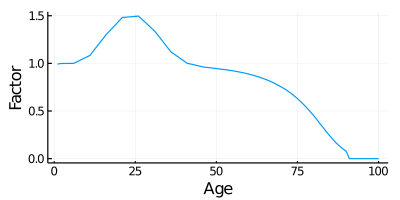

In [26]:
D = population_data()
birth = D["birth_rate"]
death = D["death_rate"]

# Dynamics matrix for populaion dynamics
A = [birth'; diagonal(1 .- death[1:end-1]) zeros(length(death)-1)]

# Contribution factor to total poulation in 2020
# from each age in 2010
cf = ones(100)'*(A^10)

using Plots
plot(cf', legend = false, xlabel = "Age", ylabel = "Factor", size = [400, 200])

**Figure 10.1** Contribution factor per age in $2010$ to the total population in $2020$. The value for age i−1 is the i:th component of the row vector 1TA10.


### 10.4 QR factorization

In Julia, the $QR$ factorization of a matrix $A$ can be found using **`qr(A)`**, which
returns a tuple with the $Q$ and $R$ factors. However the matrix $Q$ is not returned as an array, but in a special compact format. It can be converted to a regular matrix variable using the command **`Matrix(Q)`**. Hence, the `QR` factorization as defined in VMLS is computed by a sequence of two commands:

```julia
    Q, R = qr(A)
    Q = Matrix(Q)
```

The following example also illustates a second, but minor difference with the
VMLS definition. The $R$ factor computed by Julia may have negative elements on
the diagonal, as opposed to only positive elements if we follow the definition used
in VMLS. The two definitions are equivalent, because if $R_{ii}$ is negative, one can
change the sign of the ith row of R and the ith column of $Q$, to get an equivalent
factorization with $R_{ii} > 0$. However this step is not needed in practice, since
negative elements on the diagonal do not pose any problem in applications of the
$QR$ factorization.

In [27]:
A = randn(6,4)
Q, R = qr(A)
R

4×4 Matrix{Float64}:
 2.33611  -0.622461   0.0705774   0.245663
 0.0       1.71475   -0.598399    0.359515
 0.0       0.0       -1.20894     0.682029
 0.0       0.0        0.0        -0.737792

In [28]:
Q = Matrix(Q)

6×4 Matrix{Float64}:
 -0.809769   0.480742    0.220417    0.153453
 -0.292093  -0.273105   -0.553723    0.0396976
 -0.197084   0.0941398  -0.714676    0.114519
 -0.401305  -0.645205    0.0992267  -0.518422
 -0.178123   0.0866277   0.211468   -0.399433
  0.165348   0.511512   -0.281922   -0.730379

In [29]:
norm(Q*R-A)

1.0226353059951564e-15

In [30]:
Q'*Q

4×4 Matrix{Float64}:
  1.0          -3.14271e-17   8.72334e-17  -8.63389e-17
 -3.14271e-17   1.0           2.66527e-16   2.20408e-17
  8.72334e-17   2.66527e-16   1.0          -4.2401e-17
 -8.63389e-17   2.20408e-17  -4.2401e-17    1.0